In [1]:
#import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns 
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
#load all the necessary files for EDA, modelling and coding
train = pd.read_csv("./input/MNIST_train.csv")
test = pd.read_csv("./input/MNIST_test.csv")

In [3]:
train.shape

(60000, 787)

In [4]:
#drop first two columns that aren't needed
train.drop(['Unnamed: 0', 'index'], axis=1, inplace=True)
test.drop(['Unnamed: 0', 'index'], axis=1, inplace=True)

#allocate prediction_target and features for TRAINING AND VALIDATING
#normalizing integers to range between 0-1
trainy = train.iloc[:,0].values
trainX = train.iloc[:,1:].values/255

#allocate prediction_target and features for TESTING
#normalizing integers to range between 0-1
y_test= test.iloc[:,0].values
X_test = test.iloc[:,1:].values/255

In [5]:
# split DATA into TRAINING AND VALIDATING sets
y_train = trainy[0:48000,]
X_train = trainX[0:48000,]
y_val = trainy[48000:,]
X_val= trainX[48000:,]

# check dimensions of new set
y_train.shape, X_train.shape, y_val.shape, X_val.shape

((48000,), (48000, 784), (12000,), (12000, 784))

In [6]:
#inspect training features
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
#Gauss Bayesian model to predict values from the MNIST dataset
class GaussBayes():
    
    def fit(self, X,y, epsilon = 1e-3):
        self.likelihoods = dict()
        self.priors = dict()
        
        self.K = set(y.astype(int))
        
        for k in self.K:
            X_k = X[y==k, :]
            N_k , D = X_k.shape
            mu_k = X_k.mean(axis=0)
            self.likelihoods[k] = {"mean":X_k.mean(axis = 0), "cov":(1/(N_k-1))*np.matmul((X_k-mu_k).T,X_k-mu_k)+epsilon*np.identity(D)}
            self.priors[k] = len(X_k)/len(X) 
            
    def predict(self,X):
        
        N,D = X.shape
        p_hat = np.zeros((N, len(self.K)))
        for k, l  in self.likelihoods.items():
            p_hat[:,k] = mvn.logpdf(X, l["mean"], l["cov"])+ np.log(self.priors[k])
            
        return p_hat.argmax(axis=1)

In [8]:
#allocating model/class to variable
gnb = GaussBayes()

In [9]:
#calling the fit function to train the model
gnb.fit(X_train, y_train)

In [10]:
#calling the predict function to predict values given a set of data
y_hat = gnb.predict(X_val)

In [11]:
#defining function to calculate accuracy of the model
def accuracy(y, y_hat):
    return np.mean(y==y_hat)

In [12]:
# calculate accuracy of y_hat values
accuracy(y_val, y_hat)

0.9103333333333333

In [13]:
#calling the predict function to predict values given a set of data
y_hat2 = gnb.predict(X_test)

In [14]:
# calculate accuracy of y_hat2 values
accuracy(y_test, y_hat2)

0.9103

<b>EXPLORE THE DATA USING SOME VISUALIZATIONS<b>

In [15]:
#function to plot image of number from MNIST dataset when given an index
def num_gen(zex):
    #plot a number image from a given row indicated by idx 
    plt.figure(figsize=(7,7))
    idx = zex
    
    #reshape from one dimension to two dimension
    #grid_data = X_train.iloc[idx,].values.reshape(28,28)
    grid_data = X_train[idx,].reshape(28,28)
    plt.imshow(grid_data, interpolation = "none", cmap="viridis")
    plt.show()
    
    #print value from label below the image to confirm you plotted the right number
    return y_train[idx,]

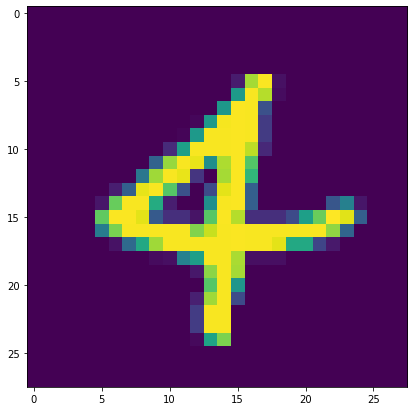

4

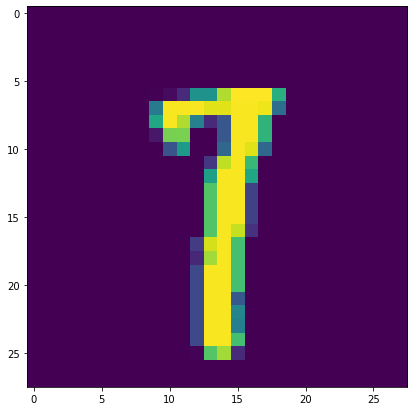

7

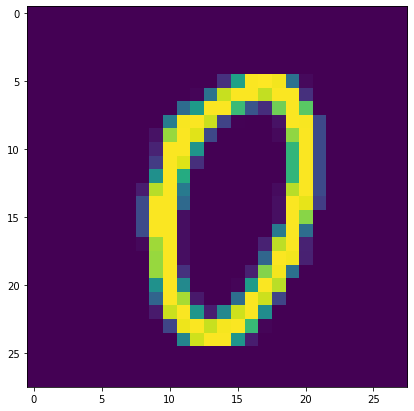

0

In [16]:
#loop submitting index values that will return number images
num = [150, 370, 1000]

#loop between indices and plot numbers
for i in num:
    p = num_gen(i)
    print(p, end="")

In [26]:
def conf_mat(y, y_hat):
    #load series of values into a dictionary with two items
    data = {'y_Actual':    y, 'y_Predicted': y_hat}
    
    #building a confusion matrix from data loaded into the data dictionary
    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
    confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

    #plot the confusion matrix heat map
    plt.figure(figsize=(10,6))
    plt.title("Confusion Matrix")
    sns.heatmap(confusion_matrix, cmap='gnuplot_r', annot=True)
    re = (confusion_matrix, plt.show())
    
    return re

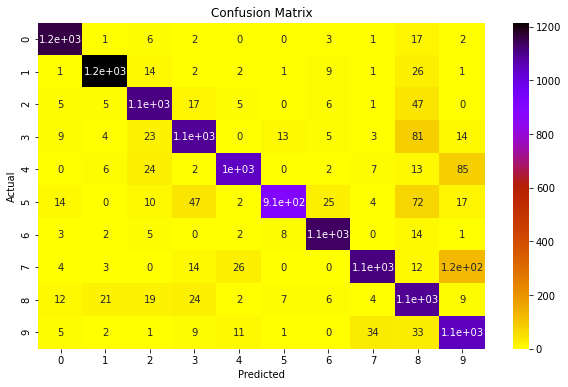

(Predicted     0     1     2     3     4    5     6     7     8     9
 Actual                                                              
 0          1162     1     6     2     0    0     3     1    17     2
 1             1  1215    14     2     2    1     9     1    26     1
 2             5     5  1110    17     5    0     6     1    47     0
 3             9     4    23  1090     0   13     5     3    81    14
 4             0     6    24     2  1048    0     2     7    13    85
 5            14     0    10    47     2  906    25     4    72    17
 6             3     2     5     0     2    8  1135     0    14     1
 7             4     3     0    14    26    0     0  1113    12   125
 8            12    21    19    24     2    7     6     4  1094     9
 9             5     2     1     9    11    1     0    34    33  1051,
 None)

In [27]:
#confusion matrix table for the tra
confusion_table = conf_mat(y_val, y_hat)
confusion_table